<a href="https://colab.research.google.com/github/Mario-bro777/ds/blob/main/hear_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('heart.xls')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


(array([172.,   6.,  70., 319., 248.,  81.,  14.,   3.,   3.,   2.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <BarContainer object of 10 artists>)

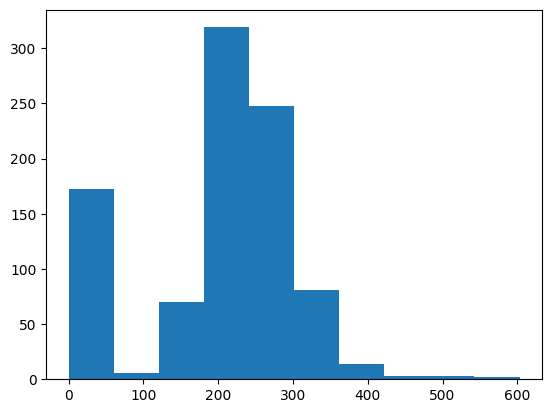

In [ ]:
plt.hist(df[[ 'Cholesterol']])

(array([725.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

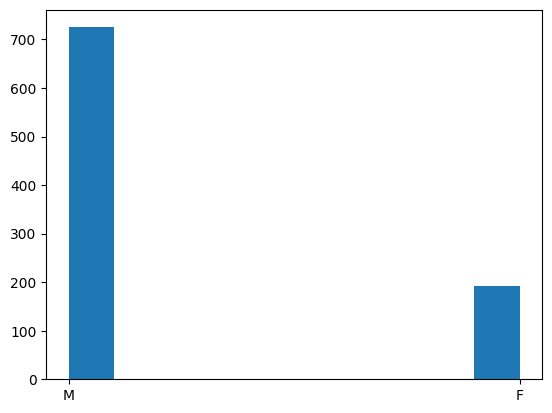

In [ ]:
plt.hist(df[[ 'Sex']])

In [ ]:
df_dummies = pd.get_dummies(df, prefix=['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'])
df_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [ ]:
y = df['HeartDisease']
del df_dummies['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dummies, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        79
           1       0.86      0.79      0.83       105

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=10)

rfc.fit(X_train, y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        79
           1       0.89      0.91      0.90       105

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



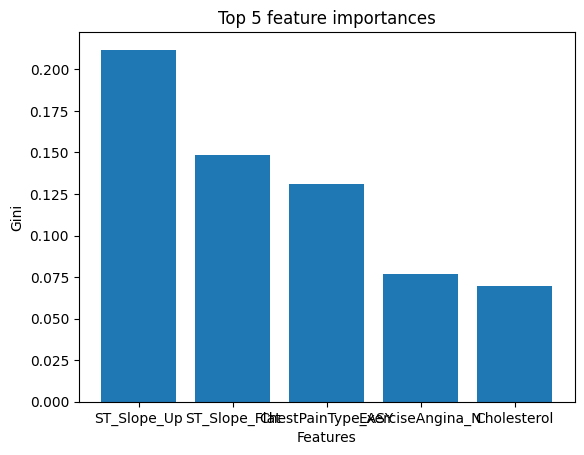

In [ ]:
imp = pd.Series(rfc.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)

plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

bclf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=10)
bclf.fit(X_train, y_train)
print(classification_report(y_test, bclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        79
           1       0.89      0.81      0.85       105

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

estimators = [
    ('dt', DecisionTreeClassifier(random_state=10)),
    ('rf', RandomForestClassifier(random_state=10)),
    ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=10)))
]

sclf = StackingClassifier(estimators=estimators)
sclf.fit(X_train,y_train)
print(classification_report(y_test, sclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        79
           1       0.90      0.91      0.91       105

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



                Accuracy
DecissionTree:   0.81

RandomForest:    0.89

Bagging:         0.83

Stacking:        0.89

Лучшие результаты по метрикам f1-score и recall показала модель StackingClassifier, использующая ансамлирование всех других моделей